<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/Markov_perfect_equilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/local/lib/python3.6/dist-packages (0.4.8)


In [26]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

In [27]:
import numpy as np
import quantecon as qe

# Parameters
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# In LQ form
A = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])


R1 = [[      0.,     -a0 / 2,          0.],
    [-a0 / 2.,          a1,     a1 / 2.],
    [       0,     a1 / 2.,          0.]]

R2 = [[     0.,           0.,      -a0 / 2],
    [     0.,           0.,      a1 / 2.],
    [-a0 / 2,      a1 / 2.,           a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# Solve using QE's nnash function
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1, 
                Q2, S1, S2, W1, W2, M1, 
                M2, beta=β)

R = np.array([[0, -a0/2],
        [-a0/2, a1]])

Q = γ
A_ = np.eye(2)
B = np.array([[0], [1]])
monoply_lq = qe.LQ(Q, R, A_, B, beta=β)
x0 = np.array([1, 2])


In [28]:
AF = A - B1 @ F1 - B2 @ F2
n = 20
x = np.empty((3, n))
x[:, 0] = 1, 1, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
q1 = x[1, :]
q2 = x[2, :]
q = q1 + q2      # Total output, MPE
p = a0 - a1 * q   # Price, MPE

x_path, u_path, _ = monoply_lq.compute_sequence(x0, n)
q_m = x_path[1, :]
p_m = a0 - a1*q_m

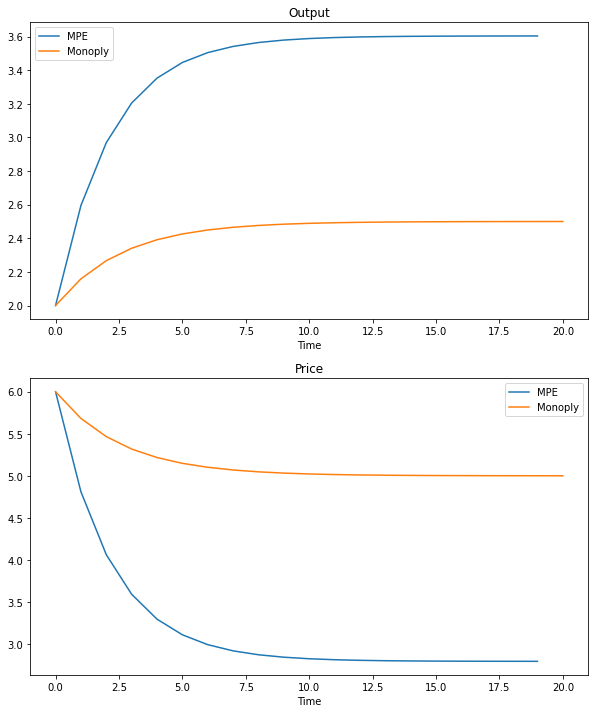

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
for ax, val1, val2, title in zip(axes.flatten(), [q, p], [q_m, p_m], ['Output', 'Price']):
  ax.plot(val1, label='MPE')
  ax.plot(val2, label='Monoply')
  ax.set(title=title, xlabel='Time')
  ax.legend();